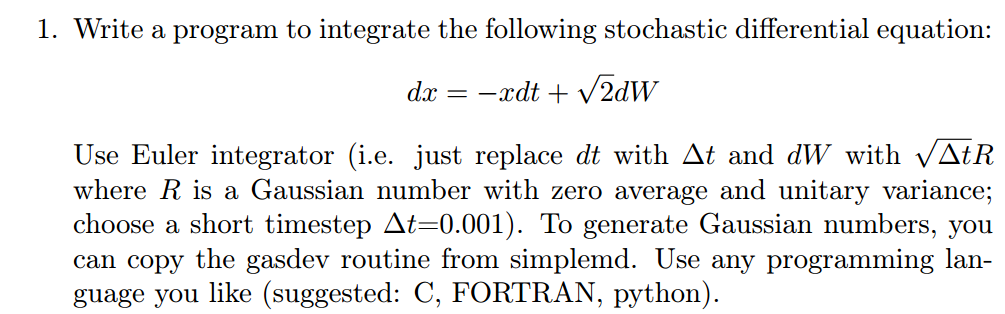

In [49]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [50]:
dt = .001

Time will be expressed in units of dt for simplicity

In [51]:
def EulerIntegrator(x):
    return x*(1-dt) + math.sqrt(2*dt)*np.random.normal()

In [52]:
# Integration!
def Simulation(nsteps, x, seed = None):
    np.random.seed(seed=seed)
    trajectory = []
    for istep in range(nsteps):
        x = EulerIntegrator(x)
        trajectory.append(x)
    return np.array(trajectory)

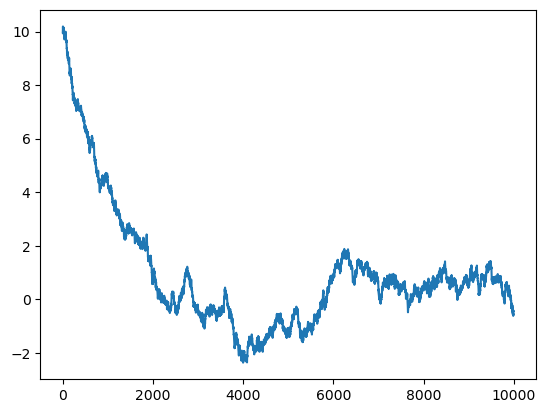

In [53]:
plt.plot( Simulation(nsteps=10000, x=10) )

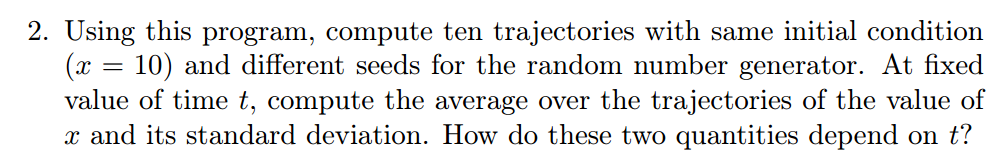


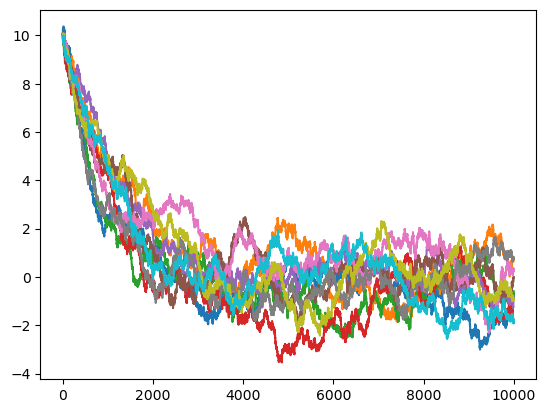

In [54]:
nsteps = 10000
ntraj = 10
trajectories = np.ndarray(shape=(nsteps,ntraj))     # Each row corresponds to a different trajectory
for itraj in range(ntraj):
    trajectories[:,itraj] = Simulation(nsteps, x=10, seed = itraj)
    plt.plot(trajectories[:,itraj])
plt.show()

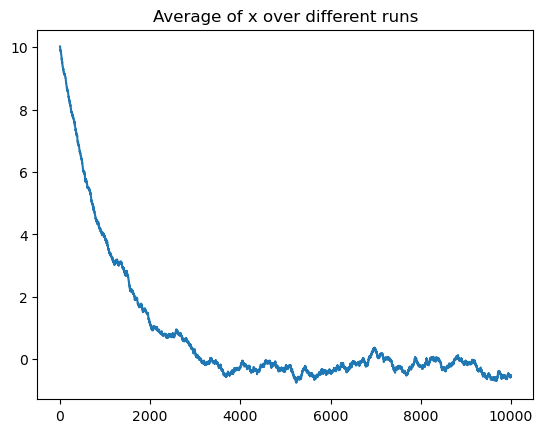

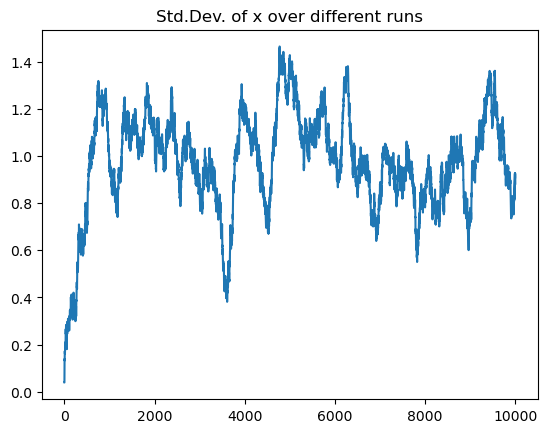

In [55]:
plt.title('Average of x over different runs')
plt.plot(np.average(trajectories, axis = 1))    # Plot of x averaged over different runs
plt.figure()
plt.title('Std.Dev. of x over different runs')
plt.plot(np.std(trajectories, axis = 1))

The average decays exponentially with t, while the variance reaches a plateau.

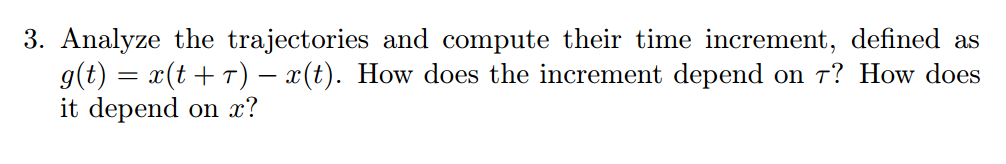

tau=1, std(g) = 0.044347850313916734
tau=10, std(g) = 0.13749405537319637
tau=100, std(g) = 0.4095377121817228
tau=1000, std(g) = 0.8162670883270733


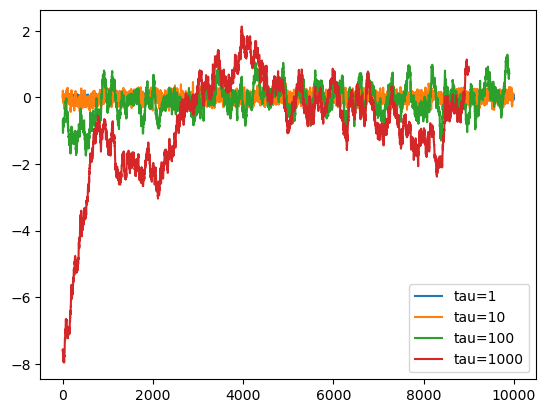

In [56]:
g = []
for tau in np.logspace(0,3, 4, dtype=int):
    g = trajectories[tau:,0]-trajectories[:-tau,0]
    plt.plot(g, label=f'tau={tau}')
    print(f'tau={tau}, std(g) = {np.std(g[4000:])}')
plt.legend()

Fluctuations of g(t) increase with tau. Note that in the calculation of stddev(g) the first 4000 points were discarded because of the transient.